In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def calculate_mean_score(model, scoring, ratios):
    score_list = []
    for ratio in ratios:
        df = pd.read_csv('diferent_ratios_scores\\' + model + '_' + str(ratio) + 'ratio.csv', delimiter=',')
        score_list.append(df[scoring].mean())
        
    return score_list
        

In [7]:
ratios = list(range(2, 9))
ratios = [ratio/10 for ratio in ratios]


knn_scores = calculate_mean_score('knn', 'roc_auc', ratios)
svm_scores = calculate_mean_score('svm_rbf', 'roc_auc', ratios)
rnf_scores = calculate_mean_score('rnf', 'roc_auc', ratios)

ratios = [(1 - ratio) for ratio in ratios]

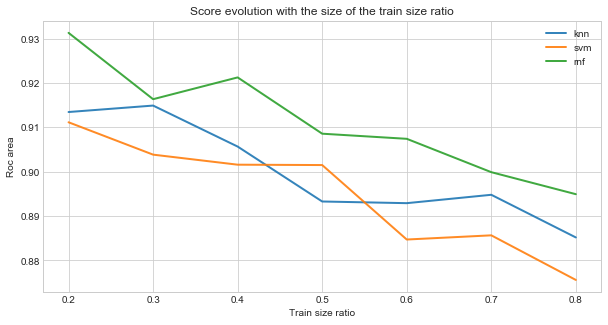

In [8]:
fig = plt.figure(figsize=(10,5))
plt.style.use('seaborn-whitegrid')
plt.plot(ratios, knn_scores[::-1], linewidth=2, alpha=0.9, label='knn')
plt.plot(ratios, svm_scores[::-1], linewidth=2, alpha=0.9, label='svm')
plt.plot(ratios, rnf_scores[::-1], linewidth=2, alpha=0.9, label='rnf')
plt.legend(loc='best')
plt.title('Score evolution with the size of the train size ratio')
plt.xlabel("Train size ratio")
plt.ylabel("Roc area")
plt.show()